# Principiante - EDA y visualizaciones


### Autor : Alexander García
----

# Visión general

Este es el tutorial de nivel principiante para Ciencia de Datos (DS) y Aprendizaje Automático (ML) donde trabajaremos de principio a fin sobre diferentes aspectos y técnicas en DS para Investigación y Análisis.

En este tutorial trabajaremos a través del proceso de análisis de datos para el conjunto de datos RNA-Seq de expresión génica de cáncer. Este es el tutorial para principiantes o novatos y nos centraremos en técnicas generales de limpieza, manipulación y análisis de datos en python. *NOTA: aunque el código está en python, las ideas y principios mostrados en este tutorial son aplicables independientemente del lenguaje de codificación. Con la traducción de código adecuada, este tutorial puede seguirse en R, con la posible excepción de algunas opciones de biblioteca específicas de python.

# Índice
[1. Configuración](#1.-Configuración)

* [1.1 Importar las Bibliotecas](#1.1-Importing-Libraries)  

* [1.2 Importar los datos](#1.2-Importing-the-Data)  
    * 1.2.1 Cargar datos y observaciones iniciales](#1.2.1-Cargar datos y observaciones iniciales)

* 1.3 Echar un vistazo](#1.3-Echar un vistazo)

* 1.4 Subconjuntar un marco de datos](#1.4-Subsetting-a-Dataframe)

* 1.5 Tratamiento de las características del problema](#1.5-Tratamiento de las características del problema)


[2. Análisis](#2.-Análisis)

* 2.1 Estadísticas descriptivas generales](#2.1-General-Descriptive-Statistics)

* 2.2 Visualización de estadísticas](#2.2-Visualización de estadísticas)

    * 2.2.1 Seaborn y Matplotlib](#2.2.1-Seaborn-&-Matplotlib)
    * 2.2.2 Formato de marco de datos para Seaborn](#2.2.2-Formato de marco de datos para Seaborn)
    
[3. TCGA Data, Specific Group Statistics, and Altair](#3.-TCGA-Data,-Specific-Group-Statistics,-and-Altair)

* 3.1 Carga y limpieza de datos TCGA](#3.1-Loading-and-Cleaning-TCGA-Data)

* 3.2 Creación de estadísticas de grupos específicos](#3.2-Creating-Specific-Group-Statistics)

* 3.3 Visualización de estadísticas con Altair](#3.3-Visualizing-Statistics-with-Altair)

# 1. Configuración

## 1.1 Importando Bibliotecas

 Introduciremos *bibliotecaspython* que serán utilizadas a lo largo de los tres cuadernos tutoriales.
> Bibliotecas utilizadas en este tutorial
* Manipulación y Procesamiento de Datos
     - [pandas]( https://pandas.pydata.org/)
     - [numpy]( https://numpy.org/)
* Visualización de datos
	- [Matplotlib](https://matplotlib.org/)
    - [Seaborn](https://seaborn.pydata.org/)
    - [Altair](https://altair-viz.github.io/)

In [1]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de librerias
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# La salida de los comandos de trazado se muestra en línea dentro del cuaderno
%matplotlib inline

## 1.2 Importar los datos
Para hacer cualquier cosa con sus datos, necesita obtener los datos en un 'objeto' con el que python pueda interactuar.

La librería Pandas que hemos importado más arriba incluye algunas funciones para leer un fichero en formato '.csv' y crear un marco de datos Pandas a partir de él:

### 1.2.1 Carga de datos y observaciones iniciales

Ahora que hemos importado nuestras librerías iniciales, podemos utilizarlas para cargar nuestros datos en el cuaderno y comenzar el análisis. Tanto **pandas** como **numpy** son potentes librerías capaces de manejar la carga de datos, pero el estándar es **pandas** ya que está diseñada para este propósito:

*ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales.*

*pandas* ofrece una variedad de funciones para la carga de datos dependiendo del tipo de formato de fichero en el que estén almacenados tus datos (ej. *csv, txt, json, ...*), los diferentes formatos pueden ser [found here]( https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

Recuerda tener la ruta correcta del archivo en relación a donde se encuentra tu cuaderno de trabajo actual para cargar correctamente el archivo (es decir, carpeta/subcarpeta/datos.csv). Para nuestro cuaderno, los archivos se encuentran en el mismo directorio para que podamos escribir los nombres en la función [*pd.read_csv()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Las funciones de pandas para leer los datos proporcionan una amplia gama de opciones para analizar los datos, como la configuración de la fila de encabezado o las columnas de índice apropiadas. Si los datos ya están formateados, las funciones son bastante adecuadas para leer estos valores por defecto. Nuestros datos deberían estar bastante bien formateados y podemos dejar los valores por defecto a estos argumentos disponibles, pero daremos los argumentos básicos para encabezados e índice como ejemplo. 

***Nota:*** *Asegúrate de haber descargado los datos en los archivos en el directorio local apropiado después de clonar el repositorio git. Si es necesario, ajuste las rutas de los archivos de abajo para que pueda cargar los datos.*

In [3]:
# cargar datos de archivos csv con pandas
# read_csv creará una estructura dataframe
raw_data = pd.read_csv('/Users/usuario/Documents/ML_python/ML_python/data_tutorial/data.csv', header=0, index_col=None)
data_labels = pd.read_csv('/Users/usuario/Documents/ML_python/ML_python/data_tutorial/labels.csv', header=0, index_col=None)

Ok genial, ¡hemos ejecutado nuestro primer código python para el análisis de datos! ... Pero debemos asegurarnos de que todo ha funcionado correctamente. Debemos asegurarnos de que todo el conjunto de datos se ha cargado correctamente y también comprobar cómo se ve el marco de datos creado.

## 1.3 Echar un vistazo

Lo primero que debe hacer es comprobar si los datos se han introducido en el marco de datos tal y como pretendía.

La forma más rápida de echar un vistazo a los datos es utilizar las funciones head() o tail(), que imprimen las primeras o las últimas filas del marco de datos.

Para comprobar que se han cargado todos los datos podemos utilizar la función df.shape, donde df es el nombre genérico dado al marco de datos creado, que nos da el número de filas y columnas que contiene el marco de datos. Luego podemos ver el marco de datos real a través de df.head(n=5), donde n es el número de filas que queremos mostrar y que por defecto es 5.

In [4]:
# shape nos dice el número de filas (casos individuales) y colores (genes)
# podemos imprimir la forma de ambos marcos de datos
# pondremos las formas de los datos en un diccionario para luego imprimirlos

shapes = {'rawdata':raw_data.shape, 'labels':data_labels.shape}
print('metadata.csv \t- Row, Col :{0[rawdata]} \ngenes.csv \t- Row, Col :{0[labels]}'
     .format(shapes))

metadata.csv 	- Row, Col :(801, 20532) 
genes.csv 	- Row, Col :(801, 2)


In [5]:
# comprobación del marco de datos cargado mediante head()
raw_data.head()

Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
0  7.175175  0.591871     0.0  ...    4.926711    8.210257    9.723516   
1  6.816049  0.000000     0.0  ...    4.593372    7.323865    9.740931   
2  6.972130  0.452595     0.0  ...    5.125213    8.127123   10.908640   
3  7.843375  0.434882     0.0  ...    6.076566    8.792959   10.141520   
4  6.566967  0.360982     0.0  ...    5.996032    8.891425   10.373790   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0    7.220030    9.119813   12.003135    9.650743    8.921326    5.286759   
1    6.256586    8.381612   12.674552   10.517059    9.397854    2.094168   
2    5.401607    9.911597    9.045255    9.788359   10.090470    1.683023   
3    8.942805    9.601208   11.392682    9.694814    9.684365    3.292001   
4    7.181162    9.846910   11.922439    9.217749    9.461191    5.110372   

   gene_20530  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 20532 columns]

In [6]:
# comprobación del dataframe cargado mediante tail()
raw_data.tail()

Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
796  sample_796     0.0  1.865642  2.718197  7.350099  10.006003     0.0   
797  sample_797     0.0  3.942955  4.453807  6.346597  10.056868     0.0   
798  sample_798     0.0  3.249582  3.707492  8.185901   9.504082     0.0   
799  sample_799     0.0  2.590339  2.787976  7.318624   9.987136     0.0   
800  sample_800     0.0  2.325242  3.805932  6.530246   9.560367     0.0   

       gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
796  6.764792  0.496922     0.0  ...    6.088133    9.118313   10.004852   
797  7.320331  0.000000     0.0  ...    6.371876    9.623335    9.823921   
798  7.536589  1.811101     0.0  ...    5.719386    8.610704   10.485517   
799  9.213464  0.000000     0.0  ...    5.785237    8.605387   11.004677   
800  7.957027  0.000000     0.0  ...    6.403075    8.594354   10.243079   

     gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
796    4.484415    9.614701   12.031267    9.813063   10.092770    8.819269   
797    6.555327    9.064002   11.633422   10.317266    8.745983    9.659081   
798    3.589763    9.350636   12.180944   10.681194    9.466711    4.677458   
799    4.745888    9.626383   11.198279   10.335513   10.400581    5.718751   
800    9.139459   10.102934   11.641081   10.607358    9.844794    4.550716   

     gene_20530  
796    0.000000  
797    0.000000  
798    0.586693  
799    0.000000  
800    0.000000  

[5 rows x 20532 columns]

Muy bien!. A simple vista parece que ambos archivos de datos se han cargado en sus respectivos marcos de datos.
Este conjunto de datos es en realidad bastante grande con más de 20K columnas, por lo que sería útil aprender a cortar y filtrar a través del marco de datos para crear un conjunto más pequeño y manejable.

## 1.4 Subconjunto de un marco de datos

Es importante ser capaz de seleccionar subconjuntos de sus datos - tanto seleccionando muestras, como seleccionando características (columnas).

Primero veamos la selección por filas...

In [7]:
# Seleccionar una fila
raw_data.iloc[1]

Unnamed: 0     sample_1
gene_0              0.0
gene_1         0.592732
gene_2         1.588421
gene_3         7.586157
                ...    
gene_20526    12.674552
gene_20527    10.517059
gene_20528     9.397854
gene_20529     2.094168
gene_20530          0.0
Name: 1, Length: 20532, dtype: object

In [8]:
# Seleccionamos varias filas
# Hacemos una lista con los índices de las filas que quieras

rows = list([1, 2, 3])
# Pasamos esa lista a iloc
raw_data.iloc[rows]

Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   

     gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
1  6.816049  0.000000     0.0  ...    4.593372    7.323865    9.740931   
2  6.972130  0.452595     0.0  ...    5.125213    8.127123   10.908640   
3  7.843375  0.434882     0.0  ...    6.076566    8.792959   10.141520   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
1    6.256586    8.381612   12.674552   10.517059    9.397854    2.094168   
2    5.401607    9.911597    9.045255    9.788359   10.090470    1.683023   
3    8.942805    9.601208   11.392682    9.694814    9.684365    3.292001   

   gene_20530  
1         0.0  
2         0.0  
3         0.0  

[3 rows x 20532 columns]

In [9]:
# Seleccionamos un rango de columnas
# Aquí ":" se refiere a todas las filas.

raw_data.iloc[:,12:15]

gene_11   gene_12   gene_13
0    1.334282  2.015391  0.591871
1    0.587845  2.466601  1.004394
2    0.452595  1.981122  1.074163
3    0.434882  2.874246  0.000000
4    1.275841  2.141204  0.000000
..        ...       ...       ...
796  0.000000  3.328722  0.000000
797  1.049282  2.666211  0.000000
798  4.049317  3.464198  0.586693
799  1.800703  3.635255  0.000000
800  2.137340  1.238665  0.000000

[801 rows x 3 columns]

Hay algo interesante en el marco de datos **raw_data**, si nos fijamos en *gene_5* y *gene_8*, podemos ver que parece que ambos están llenos de valores cero. Dado que estamos trabajando con datos de expresión génica, el hecho de que algunos genes tengan 0 es de esperar. Sin embargo, podría darse el caso de que, debido a la forma en que se cargan los datos o a un formateo previo, tuviéramos que lidiar con valores **0s** o **NA (Nan)** que no se esperan en nuestra investigación. Esto es algo que ocurre más a menudo que no, por lo que es una gran idea para comprobar siempre los valores Nan (o 0s) y pasar por las soluciones adecuadas en el manejo de estos para su campo específico de investigación, que podría ser la omisión de estos o la creación de alguna aproximación para ellos. 

## 1.5 Tratamiento de las características del problema

En este conjunto de datos, varios genes tienen una expresión 0 en cada muestra. Puede ser conveniente eliminar estas columnas antes de aplicarles determinadas herramientas estadísticas o de aprendizaje automático.

Seleccionemos las columnas en las que todos los valores no son 0. Usamos la función **.loc** - donde la función **iloc** anterior nos permite seleccionar de nuestros datos por valores de índice, **.loc** nos permite seleccionar por contenido.

Pandas tiene algunas funciones útiles incorporadas para ayudar con este tipo de problemas. Otra opción sería trabajar con algunas librerías en **numpy**, y la ventaja es para marcos de datos más grandes, ya que las funciones de numpy tienden a ser un poco más rápidas que las de pandas. Por ahora usaremos la función [*isnull()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) que encontrará por nosotros los valores NA. Esto creará un valor booleano para el dataframe comprobando si los valores son NaN (true) o no NaN (false). Usaremos esto junto con la función [*any()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) que nos permitirá subconjuntar las columnas con cualquier valor o todas las filas, igualando el valor deseado, eligiendo un eje 0 para las columnas o 1 para las filas.  

In [10]:
# Comprobación del número de NA por fila y por columna

print('Number of rows with any NA : {0:5d} \nNumber of cols with any NA : {1:5d}'
      .format(raw_data.loc[raw_data.isnull().any(axis=1),:].shape[0], raw_data.loc[:,raw_data.isnull().any(axis=0)].shape[1]))

Number of rows with any NA :     0 
Number of cols with any NA :     0


Parece que no tenemos ningún NA del que preocuparnos en nuestros datos de secuencias de genes. Sin embargo, vimos muchos valores 0 en algunos genes específicos (es decir, gen_5, gen_8), por lo que sería bueno averiguar cuántos de estos genes tienen todos valores 0 en nuestro conjunto de datos, o si alguna de las muestras individuales (filas) también tienen todos valores 0. Ahora usaremos el mismo método anterior pero con la función [*all()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.all.html) y también la función [*isin()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html) que nos permite pasar valores para que coincidan.

In [11]:
# Comprobación del número de filas y columnas que tienen todos valores cero

print('Numero de filas con todos los valores Cero : {0:5d} \nNumero de columnas con todos los valores Cero : {1:5d}'
      .format(raw_data.loc[raw_data.isin([0]).all(axis=1),:].shape[0], raw_data.loc[:,raw_data.isin([0]).all(axis=0)].shape[1]))

Numero de filas con todos los valores Cero :     0 
Numero de columnas con todos los valores Cero :   267


Como era de esperar, ninguna de nuestras muestras individuales (filas) tiene valores 0 para cada gen de la secuencia. Sin embargo, tenemos 267 genes (columnas) que tienen un valor 0 para todas las muestras y es algo que quizás queramos abordar. Una opción es eliminar estos genes de los datos, pero por ahora los mantendremos. Sin embargo, echemos un vistazo rápido a los genes que resultan ser, este es otro momento perfecto para practicar el corte y obtener un subconjunto del marco de datos.

In [12]:
# Ahora, obtendemos un subconjunto de dataframe con sólo las columnas que tienen 0 para todos los valores

raw_data.loc[:,raw_data.isin([0]).all(axis=0)]

gene_5  gene_23  gene_4370  gene_4808  gene_4809  gene_4814  gene_4816  \
0       0.0      0.0        0.0        0.0        0.0        0.0        0.0   
1       0.0      0.0        0.0        0.0        0.0        0.0        0.0   
2       0.0      0.0        0.0        0.0        0.0        0.0        0.0   
3       0.0      0.0        0.0        0.0        0.0        0.0        0.0   
4       0.0      0.0        0.0        0.0        0.0        0.0        0.0   
..      ...      ...        ...        ...        ...        ...        ...   
796     0.0      0.0        0.0        0.0        0.0        0.0        0.0   
797     0.0      0.0        0.0        0.0        0.0        0.0        0.0   
798     0.0      0.0        0.0        0.0        0.0        0.0        0.0   
799     0.0      0.0        0.0        0.0        0.0        0.0        0.0   
800     0.0      0.0        0.0        0.0        0.0        0.0        0.0   

     gene_4817  gene_4831  gene_5288  ...  gene_18908  gene_18909  gene_18910  \
0          0.0        0.0        0.0  ...         0.0         0.0         0.0   
1          0.0        0.0        0.0  ...         0.0         0.0         0.0   
2          0.0        0.0        0.0  ...         0.0         0.0         0.0   
3          0.0        0.0        0.0  ...         0.0         0.0         0.0   
4          0.0        0.0        0.0  ...         0.0         0.0         0.0   
..         ...        ...        ...  ...         ...         ...         ...   
796        0.0        0.0        0.0  ...         0.0         0.0         0.0   
797        0.0        0.0        0.0  ...         0.0         0.0         0.0   
798        0.0        0.0        0.0  ...         0.0         0.0         0.0   
799        0.0        0.0        0.0  ...         0.0         0.0         0.0   
800        0.0        0.0        0.0  ...         0.0         0.0         0.0   

     gene_18911  gene_18914  gene_18915  gene_19450  gene_19451  gene_19452  \
0           0.0         0.0         0.0         0.0         0.0         0.0   
1           0.0         0.0         0.0         0.0         0.0         0.0   
2           0.0         0.0         0.0         0.0         0.0         0.0   
3           0.0         0.0         0.0         0.0         0.0         0.0   
4           0.0         0.0         0.0         0.0         0.0         0.0   
..          ...         ...         ...         ...         ...         ...   
796         0.0         0.0         0.0         0.0         0.0         0.0   
797         0.0         0.0         0.0         0.0         0.0         0.0   
798         0.0         0.0         0.0         0.0         0.0         0.0   
799         0.0         0.0         0.0         0.0         0.0         0.0   
800         0.0         0.0         0.0         0.0         0.0         0.0   

     gene_19671  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
..          ...  
796         0.0  
797         0.0  
798         0.0  
799         0.0  
800         0.0  

[801 rows x 267 columns]

# 2. Análisis


## 2.1 Estadísticas descriptivas generales

Un comienzo importante para nuestro análisis es obtener algunas estadísticas descriptivas para nuestro marco de datos. Si lo que nos interesa son las estadísticas de genes específicos en las diferentes muestras, entonces nuestro marco de datos ya está perfectamente configurado para que utilicemos la función [*df.describe()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html), que proporciona los valores estadísticos generales de las columnas (es decir, media, sd, min, max, ...).

In [13]:
# describir dará algunos valores estadísticos
data_stat_describe = raw_data.describe()
data_stat_describe

gene_0      gene_1      gene_2      gene_3      gene_4  gene_5  \
count  801.000000  801.000000  801.000000  801.000000  801.000000   801.0   
mean     0.026642    3.010909    3.095350    6.722305    9.813612     0.0   
std      0.136850    1.200828    1.065601    0.638819    0.506537     0.0   
min      0.000000    0.000000    0.000000    5.009284    8.435999     0.0   
25%      0.000000    2.299039    2.390365    6.303346    9.464466     0.0   
50%      0.000000    3.143687    3.127006    6.655893    9.791599     0.0   
75%      0.000000    3.883484    3.802534    7.038447   10.142324     0.0   
max      1.482332    6.237034    6.063484   10.129528   11.355621     0.0   

           gene_6      gene_7      gene_8      gene_9  ...  gene_20521  \
count  801.000000  801.000000  801.000000  801.000000  ...  801.000000   
mean     7.405509    0.499882    0.016744    0.013428  ...    5.896573   
std      1.108237    0.508799    0.133635    0.204722  ...    0.746399   
min      3.930747    0.000000    0.000000    0.000000  ...    2.853517   
25%      6.676042    0.000000    0.000000    0.000000  ...    5.454926   
50%      7.450114    0.443076    0.000000    0.000000  ...    5.972582   
75%      8.121984    0.789354    0.000000    0.000000  ...    6.411292   
max     10.718190    2.779008    1.785592    4.067604  ...    7.771054   

       gene_20522  gene_20523  gene_20524  gene_20525  gene_20526  gene_20527  \
count  801.000000  801.000000  801.000000  801.000000  801.000000  801.000000   
mean     8.765891   10.056252    4.847727    9.741987   11.742228   10.155271   
std      0.603176    0.379278    2.382728    0.533898    0.670371    0.580569   
min      6.678368    8.669456    0.000000    7.974942    9.045255    7.530141   
25%      8.383834    9.826027    3.130750    9.400747   11.315857    9.836525   
50%      8.784144   10.066385    5.444935    9.784524   11.749802   10.191207   
75%      9.147136   10.299025    6.637412   10.082269   12.177852   10.578561   
max     11.105431   11.318243    9.207495   11.811632   13.715361   11.675653   

       gene_20528  gene_20529  gene_20530  
count  801.000000  801.000000  801.000000  
mean     9.590726    5.528177    0.095411  
std      0.563849    2.073859    0.364529  
min      7.864533    0.593975    0.000000  
25%      9.244219    4.092385    0.000000  
50%      9.566511    5.218618    0.000000  
75%      9.917888    6.876382    0.000000  
max     12.813320   11.205836    5.254133  

[8 rows x 20531 columns]

Ahora podemos ver los estadísticos descriptivos generales y el resumen del marco de datos de genes para las diferentes muestras. También podemos ver que, efectivamente, el gen 5 es un gen con expresión 0. 


## 2.2 Visualización de estadísticas

También podemos crear algunas visualizaciones para las estadísticas que nos ofrezcan una mejor imagen de los datos de los genes. Una de las formas básicas de lograr esto sería a través de algunos histogramas para los genes individuales. Ahora bien, nuestros datos contienen una gran cantidad de columnas (genes) y como resultado sería mejor centrarse en grupos individuales o subconjuntos más pequeños al crear histogramas para ellos. 

Pandas tiene un rápido conjunto integrado de funciones [plotting](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html), entre las que podemos trazar histogramas con la función **hist**.
Como se ha dicho antes, vamos a crear un histograma para uno de los genes, en este caso los genes 2, 4 y 6 que vamos a subconjuntar del marco de datos principal.

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

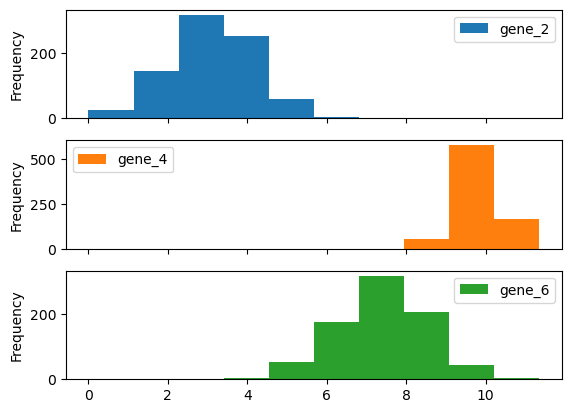

In [13]:
# # trazamos/ploteamos los genes 2, 4 y 6 en un histograma de los valores de sus secuencias genéticas para todas las muestras

raw_data.plot(y=['gene_2','gene_4','gene_6'], kind='hist', subplots=True)

Este es un buen comienzo para obtener una mejor imagen de los datos de genes. La función de ploteo de pandas puede tomar más argumentos y crear figuras más limpias si así se desea, pero para figuras mejores y más complejas pasaremos uno a usar librerías como [Matplotlib](https://matplotlib.org/) y [Seaborn](https://seaborn.pydata.org/). 

### 2.2.1 Seaborn y Matplotlib

La librería básica de ploteo en python es **matplotlib** y se pueden conseguir muchas cosas con sus funciones integradas, dependiendo de cuánto estemos dispuestos a trabajar para conseguirlo exactamente como quieres. Dado que estamos interesados en visualizaciones estadísticas, vamos a trabajar con la librería **seaborn**:
> Seaborn es una librería de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.

Muy bien, intentemos hacer un histograma, o gráfico de distribución, mejor que los básicos que hicimos antes.


/var/folders/6s/c4l75z456lvc6f7lcy342nbm0000gn/T/ipykernel_78985/3185601378.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(raw_data[col], shade=True, legend=True)
/var/folders/6s/c4l75z456lvc6f7lcy342nbm0000gn/T/ipykernel_78985/3185601378.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(raw_data[col], shade=True, legend=True)
/var/folders/6s/c4l75z456lvc6f7lcy342nbm0000gn/T/ipykernel_78985/3185601378.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(raw_data[col], shade=True, legend=True)


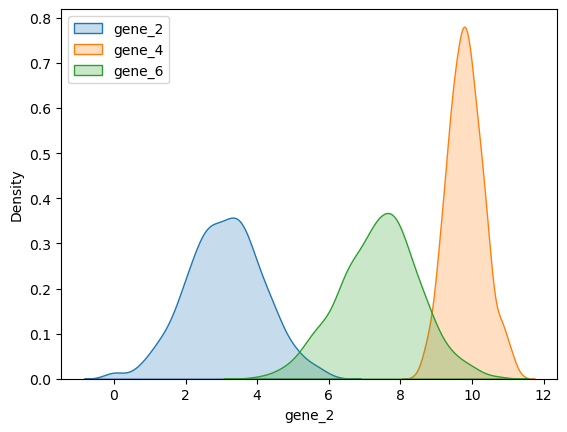

In [14]:
# seleccionando los mismos genes (2,4,6) y representándolos en la misma figura

cols = ['gene_2', 'gene_4', 'gene_6']

# Para trazar/plotear convenientemente cada columna [gen] seleccionada, usaremos un 'bucle for'
# de lo contrario tendríamos que codificar manualmente cada nombre de columna. El ejemplo sólo utiliza 3 columnas
# pero si tuviéramos muchas más columnas esto nos llevaría mucho tiempo, así que el 'bucle for' automatiza el proceso.
for col in cols:
    sns.kdeplot(raw_data[col], shade=True, legend=True)

plt.legend(cols,loc='upper left')
plt.show()

Personalmente creo que esto ya es una mejora de los gráficos que hicimos a través de pandas y matplotlib antes. Ahora tenemos los tres recuentos de genes trazados en el mismo plano, lo que puede facilitar la comparación de la distribución. Seaborn también asigna colores automáticamente para diferenciar cada recuento de genes. 

#### Observaciones gráficas
Ahora podemos ver claramente cómo _gene 6_ y _gene 2_ aunque centrados en valores diferentes, ~3 y ~8 respectivamente, parecen tener distribuciones muy similares. _Gene 4_ por otro lado, muestra una distribución muy diferente y una media más alta que los otros dos y si supiéramos más información sobre cada gen podría dar lugar a investigaciones más interesantes. La distribución similar entre el _gen 2_ y el _gen 6_ puede llevarnos a profundizar en experimentos más complejos para estos dos, y posiblemente para otros genes con distribuciones similares, ya que podría haber grandes similitudes dignas de explorar a partir de las cuales podríamos elaborar hipótesis interesantes.

&nbsp;

Más mejoras estéticas se puede lograr, y vamos a dejar que para explorar. Por ahora vamos a tratar de algunas parcelas más seaborn y mejorar la estética en esos.

Hagamos ahora una simple visualización para comprobar cómo se muestra la secuencia de genes en las muestras. Primero hagamos un gráfico simple mirando la primera muestra, **muestra_0** y trazaremos los valores genéticos de la muestra en un gráfico de dispersión.

Para hacer esto, primero necesitamos que las muestras pasen de ser los valores de fila a ser las columnas, ya que nuestras librerías de trazado necesitan que la entrada esté en vectores/series/arrays. Esto se logra muy fácilmente una vez que los datos están en un marco de datos pandas transponiendo el marco de datos.

In [15]:
# Transponer del dataframe
data_transpose = raw_data.T # el .T cuando se aplica a un marco de datos pandas transpondrá el marco de datos
data_transpose.head()

0         1         2         3         4         5    \
Unnamed: 0  sample_0  sample_1  sample_2  sample_3  sample_4  sample_5   
gene_0           0.0       0.0       0.0       0.0       0.0       0.0   
gene_1      2.017209  0.592732  3.511759  3.663618  2.655741  3.467853   
gene_2      3.265527  1.588421  4.327199  4.507649  2.821547  3.581918   
gene_3      5.478487  7.586157  6.881787  6.659068  6.539454  6.620243   

                 6         7         8         9    ...         791  \
Unnamed: 0  sample_6  sample_7  sample_8  sample_9  ...  sample_791   
gene_0           0.0       0.0       0.0       0.0  ...         0.0   
gene_1      1.224966  2.854853  3.992125  3.642494  ...    3.080061   
gene_2      1.691177  1.750478   2.77273  4.423558  ...    2.815739   
gene_3      6.572007   7.22672  6.546692  6.849511  ...    6.209617   

                   792         793         794         795         796  \
Unnamed: 0  sample_792  sample_793  sample_794  sample_795  sample_796   
gene_0             0.0         0.0         0.0    0.436588         0.0   
gene_1        4.337404    2.068224    4.288388    4.472176    1.865642   
gene_2        2.597126    0.857663     3.45249    4.908746    2.718197   
gene_3        6.070379    6.218739    7.209151    5.937848    7.350099   

                   797         798         799         800  
Unnamed: 0  sample_797  sample_798  sample_799  sample_800  
gene_0             0.0         0.0         0.0         0.0  
gene_1        3.942955    3.249582    2.590339    2.325242  
gene_2        4.453807    3.707492    2.787976    3.805932  
gene_3        6.346597    8.185901    7.318624    6.530246  

[5 rows x 801 columns]

Ok ahora vemos que los *genes* están en las filas, pero vemos que las *muestras* se convirtieron en la primera fila y queremos que sean encabezados.

In [16]:
data_transpose_new_headers_df = data_transpose.copy()
dt_new_header = data_transpose_new_headers_df.iloc[0] # coger la primera fila para la cabecera
data_transpose_new_headers_df = data_transpose_new_headers_df[1:] # tomar los datos menos la fila de cabecera
data_transpose_new_headers_df.columns = dt_new_header # establecer la fila de la cabecera como cabecera del df

In [17]:
# Comprobamos cómo se ve ahora nuestro marco de datos
data_transpose_new_headers_df.head()

Unnamed: 0   sample_0  sample_1  sample_2   sample_3  sample_4  sample_5  \
gene_0            0.0       0.0       0.0        0.0       0.0       0.0   
gene_1       2.017209  0.592732  3.511759   3.663618  2.655741  3.467853   
gene_2       3.265527  1.588421  4.327199   4.507649  2.821547  3.581918   
gene_3       5.478487  7.586157  6.881787   6.659068  6.539454  6.620243   
gene_4      10.431999  9.623011   9.87073  10.196184  9.738265  9.706829   

Unnamed: 0  sample_6  sample_7   sample_8  sample_9  ... sample_791  \
gene_0           0.0       0.0        0.0       0.0  ...        0.0   
gene_1      1.224966  2.854853   3.992125  3.642494  ...   3.080061   
gene_2      1.691177  1.750478    2.77273  4.423558  ...   2.815739   
gene_3      6.572007   7.22672   6.546692  6.849511  ...   6.209617   
gene_4      9.640511  9.758691  10.488252  9.464466  ...   9.644469   

Unnamed: 0 sample_792 sample_793 sample_794 sample_795 sample_796 sample_797  \
gene_0            0.0        0.0        0.0   0.436588        0.0        0.0   
gene_1       4.337404   2.068224   4.288388   4.472176   1.865642   3.942955   
gene_2       2.597126   0.857663    3.45249   4.908746   2.718197   4.453807   
gene_3       6.070379   6.218739   7.209151   5.937848   7.350099   6.346597   
gene_4        9.86399  10.623068    9.87562   9.330901  10.006003  10.056868   

Unnamed: 0 sample_798 sample_799 sample_800  
gene_0            0.0        0.0        0.0  
gene_1       3.249582   2.590339   2.325242  
gene_2       3.707492   2.787976   3.805932  
gene_3       8.185901   7.318624   6.530246  
gene_4       9.504082   9.987136   9.560367  

[5 rows x 801 columns]

Ahora para hacer un manejo más simple al graficar los datos en **seaborn**, tomaremos el índice del marco de datos (*Sin nombre: 0*) y lo reajustaremos para obtener un número para cada gen. Esta será la forma más rápida de recorrer los 20K genes.

In [18]:
# obtener el número de índice que en este caso también coincide con el número de gen
data_transpose_new_headers_df.reset_index(inplace=True)
data_transpose_new_headers_df['gene'] = data_transpose_new_headers_df.index # añadimos una nueva columna gen al final del marco de datos

data_transpose_new_headers_df.head()

Unnamed: 0   index   sample_0  sample_1  sample_2   sample_3  sample_4  \
0           gene_0        0.0       0.0       0.0        0.0       0.0   
1           gene_1   2.017209  0.592732  3.511759   3.663618  2.655741   
2           gene_2   3.265527  1.588421  4.327199   4.507649  2.821547   
3           gene_3   5.478487  7.586157  6.881787   6.659068  6.539454   
4           gene_4  10.431999  9.623011   9.87073  10.196184  9.738265   

Unnamed: 0  sample_5  sample_6  sample_7   sample_8  ... sample_792  \
0                0.0       0.0       0.0        0.0  ...        0.0   
1           3.467853  1.224966  2.854853   3.992125  ...   4.337404   
2           3.581918  1.691177  1.750478    2.77273  ...   2.597126   
3           6.620243  6.572007   7.22672   6.546692  ...   6.070379   
4           9.706829  9.640511  9.758691  10.488252  ...    9.86399   

Unnamed: 0 sample_793 sample_794 sample_795 sample_796 sample_797 sample_798  \
0                 0.0        0.0   0.436588        0.0        0.0        0.0   
1            2.068224   4.288388   4.472176   1.865642   3.942955   3.249582   
2            0.857663    3.45249   4.908746   2.718197   4.453807   3.707492   
3            6.218739   7.209151   5.937848   7.350099   6.346597   8.185901   
4           10.623068    9.87562   9.330901  10.006003  10.056868   9.504082   

Unnamed: 0 sample_799 sample_800 gene  
0                 0.0        0.0    0  
1            2.590339   2.325242    1  
2            2.787976   3.805932    2  
3            7.318624   6.530246    3  
4            9.987136   9.560367    4  

[5 rows x 803 columns]

¡Estupendo! Ahora podemos elegir la muestra individual que nos interesa y representarla en nuestro gráfico de dispersión.

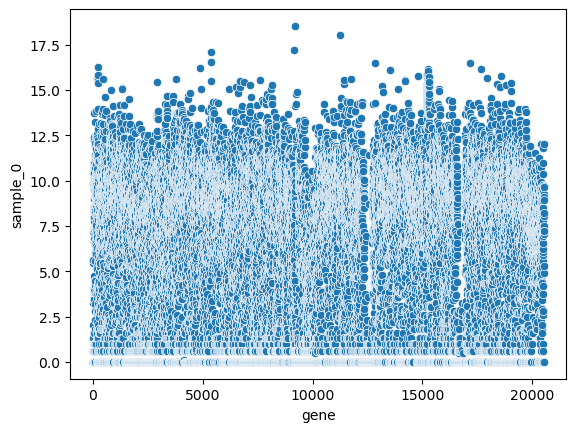

In [19]:
# primera visualización básica de gráficos de dispersión / scatterplot
sns.scatterplot(y="sample_0", x='gene', data=data_transpose_new_headers_df)
plt.show()

Muy bien, hemos creado el gráfico de dispersión visual, es brusco y pequeño, así que aquí es donde vamos a empezar a hacer ajustes para obtener una mejor comprensión de nuestros datos de genes.

Ajustaremos el tamaño de la figura, el eje, y el nivel de transparencia de los puntos (aquí conocido como alfa). También podemos tomar un momento para abordar el **"Plot Style "**, el aspecto preestablecido de que saldría de su figura. Puedes ver los diferentes estilos que matplotlib tiene disponibles [aquí](https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html). Por ahora usaremos el estilo "ggplot".

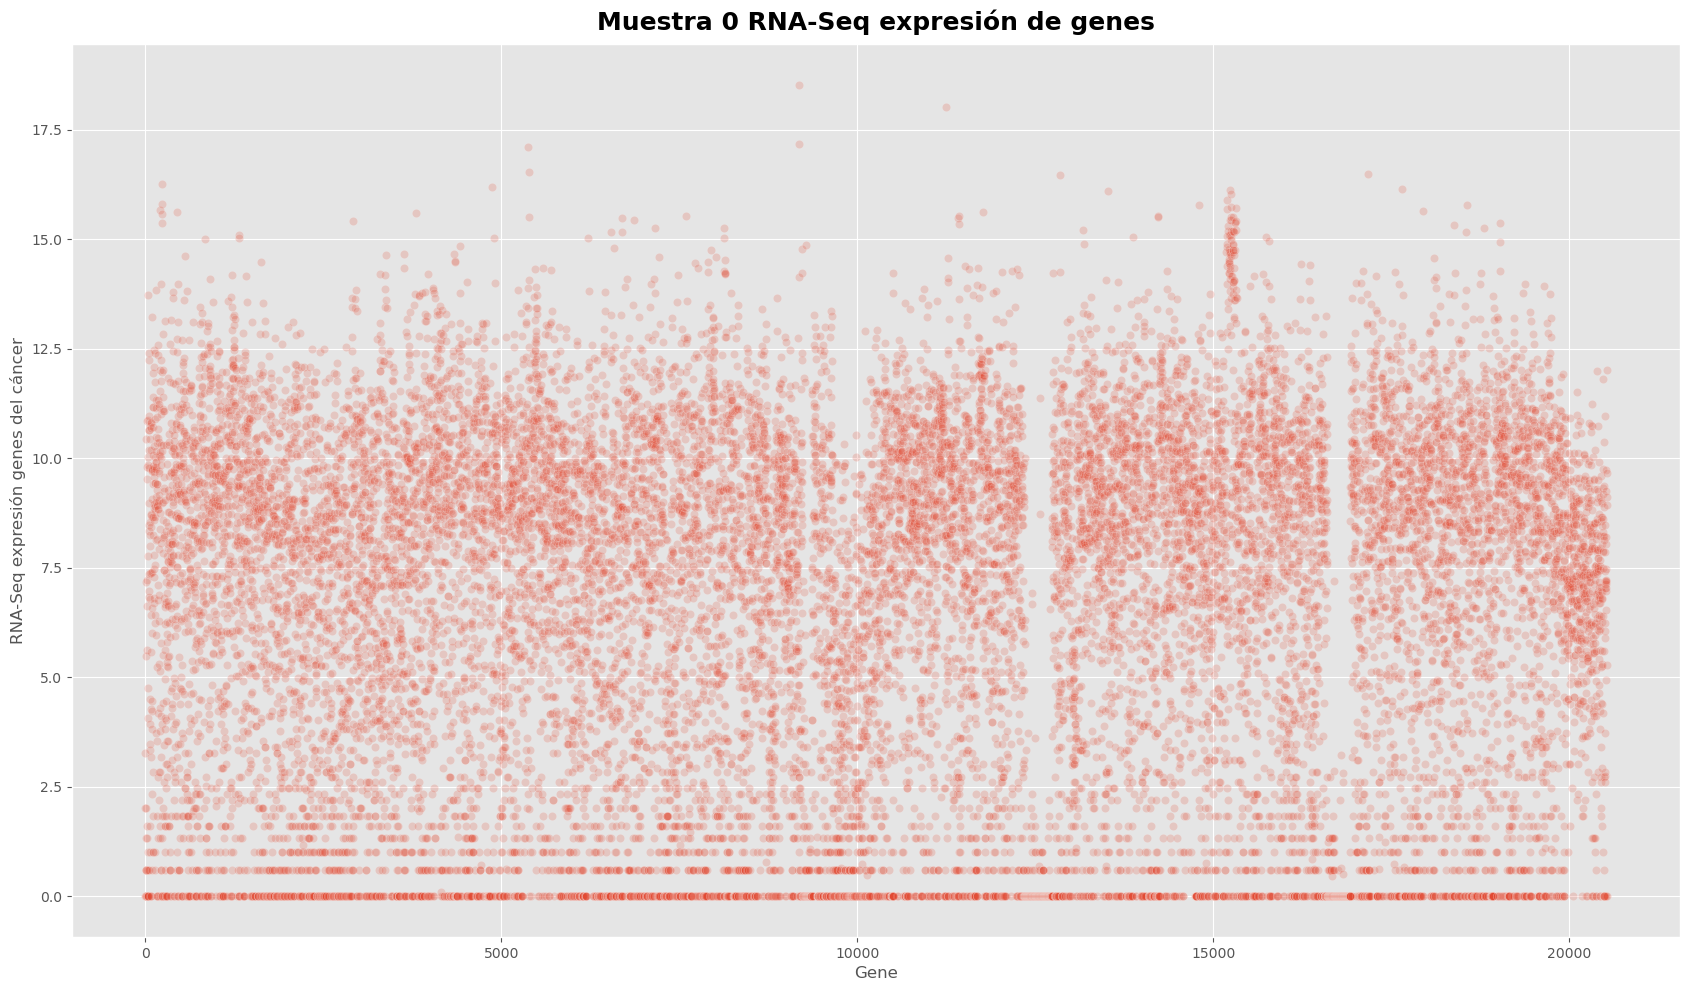

In [20]:
# # configurar el estilo del plot
plt.style.use('ggplot')

fig_dims = (17, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax, y="sample_0", x='gene', data=data_transpose_new_headers_df,
               alpha=.2)

# hacemos ajustes
ax.set_ylabel('RNA-Seq expresión genes del cáncer')
ax.set_xlabel('Gene')

ax.text(x=0.5, y=1.01, s='Muestra 0 RNA-Seq expresión de genes', fontsize=18, 
        weight='bold', ha='center', va='bottom', transform=ax.transAxes)

fig.tight_layout()
plt.savefig('/Users/usuario/Documents/ML_python/3-Outputs/sample0_expression_scatter_seaborn.png')
plt.show()

Bien, ahora que hemos ploteado la secuencia genética de una muestra, vamos a ver si podemos obtener una mejor visión de cómo se comparan las diferentes muestras para cada tipo de cáncer. Sin embargo, es necesario realizar algunas manipulaciones y transformaciones adicionales de los datos, lo que facilitará el trabajo con las bibliotecas y la creación de visuales estéticamente más agradables.

### 2.2.2 Formato Dataframe para Seaborn

Una de las grandes funcionalidades de las librerías de ploteo como seaborn, es el hecho de que podemos proporcionar argumentos específicos como etiquetas, y las funciones establecerán colores individuales y opciones de etiquetado para estos. Para lograr esto, las etiquetas deben ser proporcionadas como parte de una columna, por lo que para nuestro actual marco de datos de genes tendríamos que hacer un poco de reformateo.

Nuestro marco de datos de genes está en lo que se conoce como **formato ancho**, más columnas que filas. Dado que estamos interesados en hacer algunos EDA y visualizaciones, es más conveniente tener un marco de datos en **formato largo**, más filas que columnas, que se puede lograr por una variedad de técnicas, en este ejemplo vamos a utilizar la función **melt**.

Primero queremos añadir las etiquetas de tipo de cáncer para las muestras, lo que puede hacerse asignando los valores de columna *Class* del marco de datos de etiquetas de datos a una columna de nuestro marco de datos de genes. 

In [21]:
data_wide = raw_data.copy() # creamos una copia del marco de datos/dataframe para no interferir con el marco de datos original
data_wide['Class'] = data_labels.Class.values # asignamos valores de tipo cáncer a partir de etiquetas 
data_wide.head()

Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  gene_8  ...  gene_20522  gene_20523  gene_20524  \
0  7.175175  0.591871     0.0  ...    8.210257    9.723516    7.220030   
1  6.816049  0.000000     0.0  ...    7.323865    9.740931    6.256586   
2  6.972130  0.452595     0.0  ...    8.127123   10.908640    5.401607   
3  7.843375  0.434882     0.0  ...    8.792959   10.141520    8.942805   
4  6.566967  0.360982     0.0  ...    8.891425   10.373790    7.181162   

   gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  \
0    9.119813   12.003135    9.650743    8.921326    5.286759         0.0   
1    8.381612   12.674552   10.517059    9.397854    2.094168         0.0   
2    9.911597    9.045255    9.788359   10.090470    1.683023         0.0   
3    9.601208   11.392682    9.694814    9.684365    3.292001         0.0   
4    9.846910   11.922439    9.217749    9.461191    5.110372         0.0   

   Class  
0   PRAD  
1   LUAD  
2   PRAD  
3   PRAD  
4   BRCA  

[5 rows x 20533 columns]

Muy bien! ahora vamos a hacer algunas convenciones de nomenclatura adicionales para las columnas obteniendo las muestras como un solo número de su ubicación de índice.

In [22]:
# data_wide_noindex = data_wide.reset_index() (datos_generales/data_wide)
data_wide['Unnamed: 0'] = data_wide.index
data_wide.rename(columns={'Unnamed: 0':'Sample'}, inplace=True)
data_wide.head()

Sample  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0       0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1       1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2       2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3       3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4       4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

     gene_7  gene_8  ...  gene_20522  gene_20523  gene_20524  gene_20525  \
0  0.591871     0.0  ...    8.210257    9.723516    7.220030    9.119813   
1  0.000000     0.0  ...    7.323865    9.740931    6.256586    8.381612   
2  0.452595     0.0  ...    8.127123   10.908640    5.401607    9.911597   
3  0.434882     0.0  ...    8.792959   10.141520    8.942805    9.601208   
4  0.360982     0.0  ...    8.891425   10.373790    7.181162    9.846910   

   gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  Class  
0   12.003135    9.650743    8.921326    5.286759         0.0   PRAD  
1   12.674552   10.517059    9.397854    2.094168         0.0   LUAD  
2    9.045255    9.788359   10.090470    1.683023         0.0   PRAD  
3   11.392682    9.694814    9.684365    3.292001         0.0   PRAD  
4   11.922439    9.217749    9.461191    5.110372         0.0   BRCA  

[5 rows x 20533 columns]

Ahora implementaremos la función melt() en nuestro conjunto de datos. "Derretir/Melting" el dataframe pivota los datos en las columnas especificadas por el usuario como un nuevo índice, que puede ser de varios niveles, y convierte los encabezados de columna en valores de fila de una nueva columna variable y todos los valores de esas columnas se colocan en los respectivos valores de fila de una columna de valor.

In [23]:
# data_wide_melt = data_wide.drop(columns=['Unnamed: 0']).melt(id_vars=['Class'])
data_wide_melt = data_wide.melt(id_vars=['Class','Sample'])
data_wide_melt.head()

Class  Sample variable  value
0  PRAD       0   gene_0    0.0
1  LUAD       1   gene_0    0.0
2  PRAD       2   gene_0    0.0
3  PRAD       3   gene_0    0.0
4  BRCA       4   gene_0    0.0

Ahora cambiaremos el nombre de las columnas y eliminaremos la cadena de caracteres "gene_" de los valores de la columna variable, ya que sólo necesitamos el número del gen.

In [24]:
data_melt = data_wide_melt.copy()
data_melt['variable'] = data_melt['variable'].map(lambda x: x.lstrip('gene_'))
data_melt.rename(columns={"variable": "Gene"}, inplace=True)
data_melt.head()

Class  Sample Gene  value
0  PRAD       0    0    0.0
1  LUAD       1    0    0.0
2  PRAD       2    0    0.0
3  PRAD       3    0    0.0
4  BRCA       4    0    0.0

Ahora que nuestro dataframe está listo, podemos graficar todas las expresiones genéticas y seaborn asignará automáticamente un color a cada variable en nuestras etiquetas _Class_, esto nos ayudará a diferenciar cada tipo de cáncer. En nuestro primer visual seaborn de las distribuciones, utilizamos un "bucle for" para mostrar cada columna y seaborn asignó un color para cada una, pero no habríamos sido capaces de codificar también el tipo de cáncer en el gráfico en la forma en que los datos fueron formateados antes, ahora se convierte en un trabajo muy sencillo. Del mismo modo, si tuviéramos más etiquetas o si quisiéramos mostrar más dimensiones de nuestros datos (como la edad de la muestra, el peso, etc) en nuestro gráfico, podríamos hacerlo mejor con este formato, ya que podríamos pasarlos como argumentos a seaborn y hacer que se muestren como algo así como el tamaño o la forma de nuestros marcadores. 

*Debemos tener en cuenta que, debido al tamaño de este marco de datos, el gráfico tardará mucho tiempo en mostrarse (27 minutos aprox)

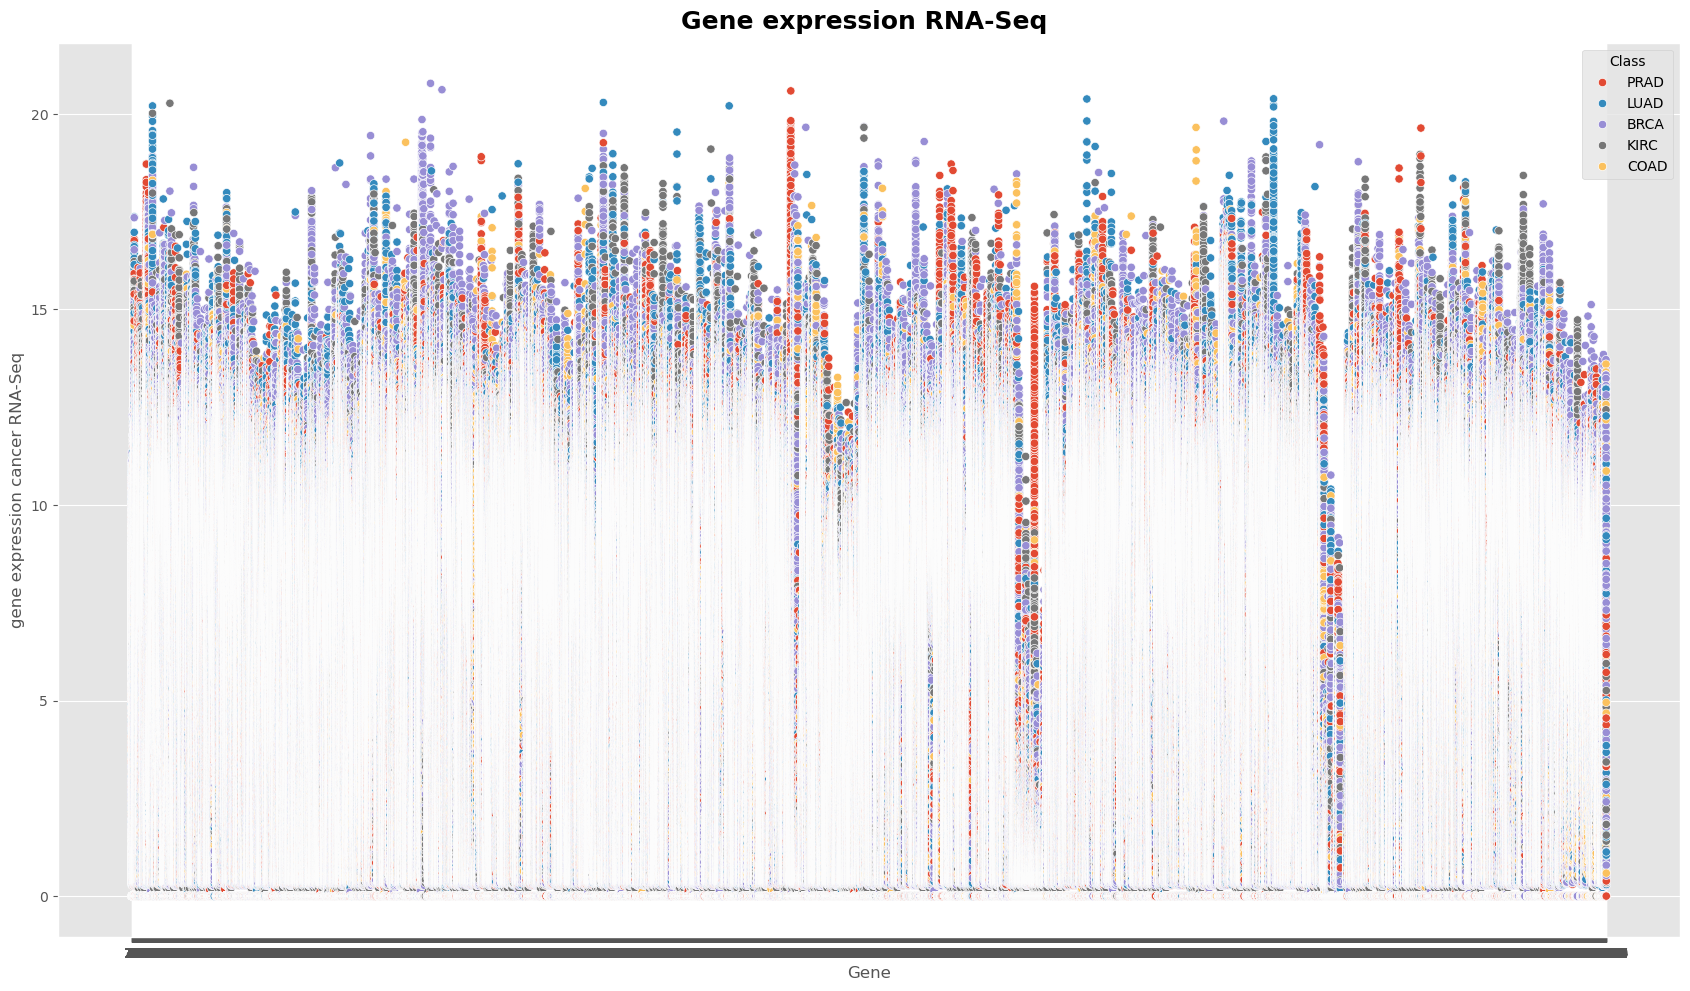

In [26]:
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data_melt, x="Gene", y="value", hue="Class")

# make adjustments
ax.set_ylabel('gene expression cancer RNA-Seq')
ax.set_xlabel('Gene')

ax.text(x=0.5, y=1.01, s='Gene expression RNA-Seq ', fontsize=18, 
        weight='bold', ha='center', va='bottom', transform=ax.transAxes)

fig.tight_layout()
plt.savefig('/Users/usuario/Documents/ML_python/ML_python/3-Outputs/gene_expression_scatter_all_samplems_seaborn.png')
plt.show()

#### Observaciones gráficas
Podemos ver que un gráfico como éste puede ser de gran ayuda para intentar comparar visualmente tipos de cáncer u otros grupos. La mayoría de los recuentos de expresión génica, independientemente del tipo de cáncer, parecen tener recuentos génicos superiores a _10_ recuentos de media, podemos hacer algunas estadísticas descriptivas para confirmarlo. Además, algo interesante es cómo los tipos de cáncer _PRAD_ (los puntos rojos), parecen tener recuentos mucho más altos en esos genes de menor expresión, en comparación con los otros tipos de cáncer. Esto podría ser una indicación de algo único sobre ese tipo de cáncer o tal vez algo único sobre el tejido del cuerpo del que se encuentra la muestra.


## 3. Datos TCGA, estadísticas de grupos específicos y Altair

De acuerdo, tenemos algo de experiencia en la limpieza y manipulación de datos, así como en algunas técnicas de visualización. Los datos que hemos utilizado hasta ahora de la investigación PANCAN eran bastante limpios y fáciles de manejar desde el principio. Como ejemplo final de este cuaderno, vamos a probar con un conjunto de datos diferente, que utilizaremos en el resto de los tutoriales. Hemos compilado un conjunto de datos inspirado en el conjunto de datos PANCAN utilizando cinco proyectos TCGA disponibles en [National Cancer Institute's Genomic Data Commons](https://gdc.cancer.gov/):
* BRCA (cáncer de mama)
* KIRC (Carcinoma renal de células claras)
* COAD (adenocarcinoma de colon)
* LUAD (adenocarcinoma de pulmón)
* PRAD (adenocarcinoma de próstata)

los mismos que se encuentran en el conjunto de datos PANCAN, pero con la comodidad añadida de que los metadatos están disponibles para este conjunto de datos.

Puede encontrar la información para acceder a los datos en la ruta [Data](https://github.com/fredhutchio/ml-pancancer-example/tree/main/data) en este directorio git.


### 3.1 Carga y limpieza de los datos TCGA

Algo a tener en cuenta antes de cargar los datos TCGA es el tamaño de este archivo. Estos nuevos datos son bastante grandes, de hecho tienen el doble de tamaño que el conjunto de datos original de PANCAN, por lo que podríamos encontrarnos con el problema de quedarnos sin memoria suficiente en nuestro portátil. Tenemos un conjunto de datos muy grande y posiblemente podría dar lugar a un gran uso de memoria. Utilizaremos nuestro archivo *metadata.csv* para crear un subconjunto más pequeño que esperamos que contenga una representación del conjunto de datos más grande.

Podríamos seguir adelante y subconjuntar el conjunto de datos de genes de la misma manera que hicimos anteriormente en este Cuaderno de Novato, sin embargo tenemos la posibilidad de no obtener una muestra representativa del conjunto de datos, digamos que podríamos terminar con diferentes proporciones para el número de LUAD o PRAD que las que teníamos originalmente en nuestro archivo de genes más grande. Así que trabajaremos primero con nuestro conjunto de datos de metadatos y aprenderemos un poco de él. 

In [25]:
# Cargamos ahora los metadatos/metadata
metadata = pd.read_csv('/Users/usuario/Documents/ML_python/ML_python/ml_pancancer_python/metadata.csv')

metadata.head(3)

barcode shortLetterCode tumor_stage  age_at_diagnosis  \
0  TCGA-A2-A1FW-01A-11R-A13Q-07              TP  stage iiia           22779.0   
1  TCGA-AO-A0J4-01A-11R-A034-07              TP    stage ia           15052.0   
2  TCGA-AN-A04C-01A-21R-A034-07              TP   stage iib           18851.0   

   year_of_diagnosis alcohol_history                       race  \
0             2010.0    Not Reported                      white   
1             2009.0    Not Reported  black or african american   
2             2008.0    Not Reported                      white   

                ethnicity  gender vital_status  year_of_birth  year_of_death  \
0  not hispanic or latino  female        Alive         1948.0            NaN   
1  not hispanic or latino  female        Alive         1968.0            NaN   
2  not hispanic or latino  female        Alive         1957.0            NaN   

   days_to_death cancer_type  
0            NaN        BRCA  
1            NaN        BRCA  
2            NaN        BRCA

Ahora podemos ver los diferentes datos demográficos disponibles en el conjunto de datos para cada una de las muestras individuales. Comprobemos tanto la forma del marco de datos como las proporciones de todo el marco de datos para los tipos de cáncer.

In [26]:
# comprobación de la forma
print('Number of rows : {0:5d} \nNumber of cols : {1:5d}'
      .format(metadata.shape[0],metadata.shape[1]))

pd.DataFrame(metadata.groupby(['cancer_type'])['barcode'].count()/metadata.shape[0]).rename(columns={'barcode':'Proportion'})

Number of rows :  3499 
Number of cols :    14


Proportion
cancer_type            
BRCA           0.349243
COAD           0.148900
KIRC           0.174621
LUAD           0.169763
PRAD           0.157474

El archivo de metadatos nos muestra que tenemos más de 3000 muestras de los 5 tipos de cáncer diferentes y cada una con una variedad de datos demográficos adjuntos. Queremos seleccionar aleatoriamente entre estas muestras para concertar la información.

En Ciencia de Datos y específicamente en Aprendizaje Automático, tenemos una librería python diseñada para modelos y técnicas de aprendizaje automático, la librería [scikit-learn](https://scikit-learn.org/stable/index.html). La utilizaremos en nuestro **Cuaderno del Experto** pero por ahora queremos utilizar una función útil de scikit-learn para dividir conjuntos de datos, la [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [27]:
# locargar la función específica de la biblioteca scikit-learn (sklearn)
from sklearn.model_selection import train_test_split

La función **train_test_split** tomará nuestro marco de datos (dataframe) y devolverá una división con un marco de datos más grande y otro más pequeño, o un marco de datos de entrenamiento y otro de prueba, de acuerdo con un parámetro **test_size** que especifica el tamaño del marco de datos más pequeño comparado con el marco de datos original. Queremos una muestra más pequeña que la original, así que mientras que el valor por defecto sería un tamaño de prueba del 25% (.25), nosotros lo mantendremos en el 10%.

In [28]:
# dividimos los datos y obtenemos un tamaño de datos test_size o small_split de .10
# Por convención llamados Train y Test dataframes, los llamaremos big_split y small_split por ahora

big_split, small_split = train_test_split(metadata, test_size=.1, random_state=4)

In [29]:
# comprobación de la forma y las proporciones de la pequeña división
print('Number of rows : {0:5d} \nNumber of cols : {1:5d}'
      .format(small_split.shape[0],small_split.shape[1]))

pd.DataFrame(small_split.groupby(['cancer_type'])['barcode'].count()/small_split.shape[0]).rename(
    columns={'barcode':'Proportion'})

Number of rows :   350 
Number of cols :    14


Proportion
cancer_type            
BRCA           0.320000
COAD           0.168571
KIRC           0.188571
LUAD           0.137143
PRAD           0.185714

Al comprobar las proporciones, vemos que la distribución de los tipos de cáncer es muy similar a la del metadato original, que es lo que esperábamos. 

¿Por qué hemos hecho todo esto? ¿Por qué no cargar el archivo genes.csv de inmediato?
Bueno, podríamos haberlo hecho, pero de nuevo podríamos habernos encontrado con problemas de memoria insuficiente (este fue el caso cuando intenté cargarlo en R Studio). Las funciones de lectura de ficheros para cargar datos de la librería pandas, en este caso *read_csv*, nos permiten cargar filas y columnas específicas del fichero en cuestión utilizando los argumentos *skiprows* y *usecols*. Por ahora mantendremos todas nuestras columnas, pero seguiremos adelante y utilizaremos las filas del índice en el marco de datos **small_split**.

In [30]:
# Obteniendo el índice en orden del big_split, ya que queremos saltarnos esos 
# necesitamos añadir 1 para no tener problemas con las cabeceras del archivo csv

skiplines = np.sort(big_split.index) + 1 

genes_small = pd.read_csv('/Users/usuario/Documents/ML_python/ML_python/ml_pancancer_python/genes.csv', skiprows=skiplines) # assigning rows to skip

genes_small.shape #checking the shape

(350, 56449)

Bien, parece que hemos conseguido lo que queríamos. Ahora vamos a seguir con los pasos habituales de comprobación de los datos y limpieza que ya hicimos anteriormente en el tutorial.

In [31]:
# vistazo rápido a los datos
genes_small.head(3)

barcode  ENSG00000000003  ENSG00000000005  \
0  TCGA-BH-A18I-01A-11R-A12D-07     68649.025091      4575.767077   
1  TCGA-BH-A0C1-01B-11R-A12D-07    696814.135821      1726.076978   
2  TCGA-A8-A07G-01A-11R-A034-07    236498.144205      2370.679437   

   ENSG00000000419  ENSG00000000457  ENSG00000000460  ENSG00000000938  \
0    521514.449025     96843.776876     37541.631314     70686.864260   
1    556314.824401    200106.626803    115325.271771     40396.859144   
2    691662.733062    127339.048434     44194.027131     31961.428948   

   ENSG00000000971  ENSG00000001036  ENSG00000001084  ...  ENSG00000281880  \
0    231379.239015    379041.542660     70606.680649  ...              0.0   
1    221005.137293    500600.176081     94118.665967  ...              0.0   
2    162563.597256    577929.407637    206925.964129  ...              0.0   

   ENSG00000281883  ENSG00000281887  ENSG00000281896  ENSG00000281903  \
0       456.782304              0.0     69912.075855      2026.680878   
1       387.693071              0.0     76644.574692      8791.833629   
2       387.255874              0.0     69149.290849      1240.923362   

   ENSG00000281904  ENSG00000281909  ENSG00000281910  ENSG00000281912  \
0              0.0              0.0         0.000000     19785.708017   
1              0.0              0.0      2554.213175      7719.399817   
2              0.0              0.0         0.000000      7710.694734   

   ENSG00000281920  
0      1466.942452  
1       933.798365  
2      1399.117996  

[3 rows x 56449 columns]

In [32]:
# Comprobamos que los valores son los mismos para los códigos de barras de las muestras.
# podemos hacerlo haciendo una 'media' de poner las columnas iguales entre sí y comprobando esto
# de la media no es '1', entonces al menos uno de estos valores no es el mismo

np.mean(small_split['barcode'].sort_index().values == genes_small['barcode'])

1.0

In [33]:
# no hay valores NA, pero comprobemos cuántos todos 0 tenemos
print('Number of rows with all Zero values : {0:5d} \nNumber of cols with all Zero values : {1:5d}'
      .format(genes_small.loc[genes_small.isin([0]).all(axis=1),:].shape[0], 
              genes_small.loc[:,genes_small.isin([0]).all(axis=0)].shape[1]))

Number of rows with all Zero values :     0 
Number of cols with all Zero values :  1832


Hasta acá hemos visto que, de hecho, hemos cargado a la derecha las filas y también tenemos bastantes miles de genes sin expresión. Además, si nos fijamos en los valores de este marco de datos de genes en comparación con el PANCAN de antes, son muy grandes. El PANCAN había sido transformado, probablemente por una **transformación logarítmica**, para hacer los valores más pequeños. Hagamos una transformación logarítmica del marco de datos y eliminemos los genes sin expresión para terminar la "limpieza".

In [34]:
# eliminación de genes sin expresión / dropping genes with no expression
genes_nonAllZero = genes_small.loc[:,~genes_small.isin([0]).all(axis=0)]

# Transformamos el dataframe por un log base 2, pero hay otras opciones disponibles
# necesidad de omitir ninguna columna de valor entero, el 'código de barras' en este caso para los errores

genes_log2_trans = np.log2(genes_nonAllZero.iloc[:,1:] + 1)
genes_log2_trans['barcode'] = genes_small['barcode'] # volver a añadir código de barras
genes_log2_trans.head(3)

ENSG00000000003  ENSG00000000005  ENSG00000000419  ENSG00000000457  \
0        16.066973        12.160113        18.992350        16.563387   
1        19.410416        10.754117        19.085545        17.610417   
2        17.851475        11.211693        19.399711        16.958327   

   ENSG00000000460  ENSG00000000938  ENSG00000000971  ENSG00000001036  \
0        15.196242        16.109175        17.819906        18.532000   
1        16.815362        15.301991        17.753727        18.933302   
2        15.431596        14.964089        17.310654        19.140536   

   ENSG00000001084  ENSG00000001167  ...  ENSG00000281883  ENSG00000281887  \
0        16.107538        18.042538  ...         8.838518              0.0   
1        16.522209        19.331350  ...         8.602488              0.0   
2        17.658762        17.598664  ...         8.600864              0.0   

   ENSG00000281896  ENSG00000281903  ENSG00000281904  ENSG00000281909  \
0        16.093275        10.985615              0.0              0.0   
1        16.225915        13.102112              0.0              0.0   
2        16.077448        10.278360              0.0              0.0   

   ENSG00000281910  ENSG00000281912  ENSG00000281920  \
0         0.000000        14.272244        10.519580   
1        11.319228        12.914460         9.868511   
2         0.000000        12.912832        10.451333   

                        barcode  
0  TCGA-BH-A18I-01A-11R-A12D-07  
1  TCGA-BH-A0C1-01B-11R-A12D-07  
2  TCGA-A8-A07G-01A-11R-A034-07  

[3 rows x 54617 columns]

Finalmente llegamos a un conjunto de datos similar al del PANCAN.

### 3.2 Creando Estadísticas de Grupos Específicos

Muy bien! la razón por la que queremos usar este conjunto de datos de genes es debido a que tiene más información descriptiva así como datos demográficos, que posiblemente podamos buscar en [COSMIC](https://cancer.sanger.ac.uk/) para información sobre genes.

Ahora mismo estamos interesados en ver si podemos sacar algunas conclusiones sobre las secuencias de genes de cada tipo de cáncer. ¿Hay algunos genes que tienen valores de recuento más altos que otros, posiblemente mostrando la importancia de un gen en la influencia del cáncer?

Añadamos las etiquetas de los tipos de cáncer y obtengamos algunos resúmenes estadísticos.

In [35]:
# fusionamos los datos demográficos de los metadatos de small_split con el marco de datos de genes

genes_merged = pd.merge(left=small_split, right=genes_log2_trans, how='left', left_on='barcode', right_on='barcode')
genes_merged.head(3)

barcode shortLetterCode   tumor_stage  \
0  TCGA-YL-A8HJ-01A-11R-A36G-07              TP  not reported   
1  TCGA-OL-A66K-01A-11R-A29R-07              TP     stage iia   
2  TCGA-D8-A1X7-01A-11R-A14M-07              TP     stage iia   

   age_at_diagnosis  year_of_diagnosis alcohol_history   race  \
0           21416.0             2009.0    Not Reported  white   
1           26299.0             2010.0    Not Reported  white   
2           14858.0             2010.0    Not Reported  white   

                ethnicity  gender vital_status  ...  ENSG00000281880  \
0  not hispanic or latino    male        Alive  ...              0.0   
1  not hispanic or latino  female         Dead  ...              0.0   
2  not hispanic or latino  female        Alive  ...              0.0   

   ENSG00000281883  ENSG00000281887 ENSG00000281896  ENSG00000281903  \
0         9.514700         0.000000       16.623075        11.229908   
1         0.000000         7.541357       15.186443        10.850017   
2         7.371455         0.000000       16.080059        11.664703   

   ENSG00000281904  ENSG00000281909  ENSG00000281910  ENSG00000281912  \
0         0.000000         0.000000        11.648106        14.595309   
1         7.744871        10.110324         0.000000        14.185199   
2         0.000000         0.000000        11.083273        12.384756   

   ENSG00000281920  
0        10.197190  
1        11.460256  
2        10.953567  

[3 rows x 54630 columns]

Todos los datos demográficos y metadatos se han fusionado con sus respectivas secuencias genéticas. Nos centraremos en los tipos de cáncer y obtendremos algunas estadísticas descriptivas como: media, desviación estándar, percentiles, etc. 

En lugar de utilizar la función *describe()* de antes, tendremos que agrupar las muestras por el tipo de etiqueta o *group*. Utilizaremos la función [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), que agrupa un marco de datos por una columna de etiqueta específica. A continuación, podemos realizar alguna función agregada (suma, media, etc.) combinando la función *groupby* con la función [agg()](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html). 

In [36]:
# eliminamos todas las columnas que no sean expresión génica, código de barras y tipo_cáncer
# las columnas eliminadas son las de índice 1 a 12

data_rename = genes_merged.drop(genes_merged.iloc[:, 1:13], axis=1)

# renombramos las columnas código de barras y tipo de cáncer
data_rename.rename(columns={'barcode':'Sample Number', 'cancer_type':'Class'}, inplace=True)

data_count_byClass = data_rename.groupby(['Class'])[['Sample Number']].agg('count')
data_gene_mean_byClass = data_rename.drop(columns=['Sample Number']).groupby(['Class']).agg('mean')
data_gene_std_byClass = data_rename.drop(columns=['Sample Number']).groupby(['Class']).agg(np.std)
data_gene_min_byClass = data_rename.drop(columns=['Sample Number']).groupby(['Class']).agg('min')
data_gene_max_byClass = data_rename.drop(columns=['Sample Number']).groupby(['Class']).agg('max')
data_gene_q25_byClass = data_rename.drop(columns=['Sample Number']).groupby(['Class']).quantile(0.25)
data_gene_q75_byClass = data_rename.drop(columns=['Sample Number']).groupby(['Class']).quantile(0.75)
data_gene_q90_byClass = data_rename.drop(columns=['Sample Number']).groupby(['Class']).quantile(0.90)

Bien, hemos creado matrices de resumen para cada una de las estadísticas especificadas para los grupos de tipo de cáncer para cada secuencia de expresión génica. Echemos un vistazo rápido a uno de ellos para ver la media y el cuantil 75.

In [37]:
# Media de la expresión de cada gen por tipo de cáncer
data_gene_mean_byClass

ENSG00000000003  ENSG00000000005  ENSG00000000419  ENSG00000000457  \
Class                                                                       
BRCA         17.820487        11.380308        19.345532        16.582702   
COAD         19.522268        13.204120        19.918876        15.766276   
KIRC         18.039506        11.524577        18.809128        15.379432   
LUAD         18.139404         4.181485        19.160521        15.911955   
PRAD         18.360742         8.391704        19.028556        16.146609   

       ENSG00000000460  ENSG00000000938  ENSG00000000971  ENSG00000001036  \
Class                                                                       
BRCA         15.506399        15.667694        16.997621        18.855948   
COAD         15.222809        15.176650        15.877086        19.481048   
KIRC         13.754263        16.600690        17.222134        19.361350   
LUAD         14.924139        16.871970        17.643702        19.246957   
PRAD         14.038836        14.879897        15.592449        18.990610   

       ENSG00000001084  ENSG00000001167  ...  ENSG00000281880  \
Class                                    ...                    
BRCA         16.776556        18.230445  ...         0.937077   
COAD         17.095496        17.840849  ...         0.894831   
KIRC         16.524883        17.336678  ...         0.687748   
LUAD         17.432379        18.037890  ...         0.138523   
PRAD         17.006010        17.693361  ...         0.380080   

       ENSG00000281883  ENSG00000281887  ENSG00000281896  ENSG00000281903  \
Class                                                                       
BRCA          7.389952         0.895765        15.608890        10.849077   
COAD          8.022896         0.269818        15.658656         9.999835   
KIRC          9.241211         2.184700        15.282897         9.603551   
LUAD          7.664326         0.811108        15.734071         9.540636   
PRAD          6.555696         0.326739        14.737812        10.486466   

       ENSG00000281904  ENSG00000281909  ENSG00000281910  ENSG00000281912  \
Class                                                                       
BRCA          2.411495         3.794070         2.320546        14.143176   
COAD          1.327108         1.315701         1.363564        12.869153   
KIRC          3.225500         2.852978         2.163496        14.144646   
LUAD          2.709817         2.173980         2.715294        13.311457   
PRAD          2.689390         4.593908         1.553468        14.939175   

       ENSG00000281920  
Class                   
BRCA          9.914829  
COAD          3.623831  
KIRC          8.762569  
LUAD          8.777995  
PRAD          8.491484  

[5 rows x 54616 columns]

In [38]:
# el percentil 75 para cada expresión génica por tipo de cáncer

data_gene_q75_byClass

ENSG00000000003  ENSG00000000005  ENSG00000000419  ENSG00000000457  \
Class                                                                       
BRCA         18.676000        14.306681        19.504220        17.032725   
COAD         20.282844        14.694380        20.432079        15.973490   
KIRC         18.456131        13.322462        19.010984        15.649808   
LUAD         18.567290         9.042148        19.409334        16.199223   
PRAD         18.745068        11.775093        19.180848        16.478537   

       ENSG00000000460  ENSG00000000938  ENSG00000000971  ENSG00000001036  \
Class                                                                       
BRCA         16.032372        16.243788        17.601688        19.205294   
COAD         15.642044        16.004500        16.808022        19.659767   
KIRC         14.105744        17.270700        18.177314        19.633115   
LUAD         15.510534        17.611011        18.293108        19.705139   
PRAD         14.267807        15.254984        16.460105        19.294751   

       ENSG00000001084  ENSG00000001167  ...  ENSG00000281880  \
Class                                    ...                    
BRCA         17.243733        18.596295  ...              0.0   
COAD         17.455072        18.098355  ...              0.0   
KIRC         16.928477        17.576228  ...              0.0   
LUAD         19.070089        18.424070  ...              0.0   
PRAD         17.363378        17.949465  ...              0.0   

       ENSG00000281883  ENSG00000281887  ENSG00000281896  ENSG00000281903  \
Class                                                                       
BRCA         10.068334          0.00000        16.859433        11.884926   
COAD         10.477328          0.00000        16.464876        10.578767   
KIRC         10.587767          6.95442        16.636211        10.262667   
LUAD         10.028179          0.00000        16.383301        10.297018   
PRAD          9.188841          0.00000        15.712016        11.173716   

       ENSG00000281904  ENSG00000281909  ENSG00000281910  ENSG00000281912  \
Class                                                                       
BRCA          7.200656         9.232943              0.0        14.739607   
COAD          0.000000         0.000000              0.0        13.330105   
KIRC          7.538895         8.667059              0.0        14.697132   
LUAD          7.366346         0.000000              0.0        13.905141   
PRAD          7.587463         9.402272              0.0        15.427435   

       ENSG00000281920  
Class                   
BRCA         11.975932  
COAD          9.228731  
KIRC         11.157049  
LUAD         11.355900  
PRAD         11.416818  

[5 rows x 54616 columns]

Genial, así que hemos creado estadísticas de resumen para cada expresión génica, ¿qué más podemos conseguir o cómo serán útiles? 
Bueno, como sabemos, hay muchos genes en nuestro conjunto de datos, por no mencionar que hay algunos con valores de expresión mucho más altos que otros. Digamos que si supiéramos con certeza que tener un recuento alto de secuencias de ARN está positivamente correlacionado como una indicación de que ese gen tiene influencia en la expresión del cáncer. Entonces podríamos buscar un valor de resumen estadístico, digamos la media o uno de los cuantiles, y hacer de esto un punto de corte para poder subdividir nuestros datos en aquellos genes que nos interesan.

Así es como haremos nuestro análisis aquí, obtendremos el "promedio" de cada una de estas estadísticas para luego obtener los genes que muestran la expresión más alta en general. Utilizaremos la función *describe* para cada uno de los tipos de cáncer e intentaremos elegir un "corte" con el que nos sintamos cómodos basándonos en los valores que veamos.

In [39]:
# Un dataframe para la media global de cada tipo de cáncer

print('Dataframe for Averages of Cancer types')
pd.concat([
    data_gene_mean_byClass.loc['BRCA', ].describe(),
    data_gene_mean_byClass.loc['COAD', ].describe(),
    data_gene_mean_byClass.loc['KIRC', ].describe(),
    data_gene_mean_byClass.loc['LUAD', ].describe(),
    data_gene_mean_byClass.loc['PRAD', ].describe()
    ], axis=1
         )

Dataframe for Averages of Cancer types


BRCA          COAD          KIRC          LUAD          PRAD
count  54616.000000  54616.000000  54616.000000  54616.000000  54616.000000
mean       8.000623      7.574212      8.121622      8.037325      7.908663
std        6.583406      6.743721      6.518284      6.638478      6.719978
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        1.313867      0.864209      1.609455      1.268499      1.044736
50%        7.152776      6.009849      7.286367      7.238933      6.942570
75%       14.103475     13.902903     14.163970     14.199120     14.218060
max       25.306375     25.886817     26.174118     26.640649     26.358911

In [40]:
# Un dataframe para la media global de cada tipo de cáncer

print('Dataframe for the 90th Percentile of Cancer types')
pd.concat([
    data_gene_q90_byClass.loc['BRCA', ].describe(),
    data_gene_q90_byClass.loc['COAD', ].describe(),
    data_gene_q90_byClass.loc['KIRC', ].describe(),
    data_gene_q90_byClass.loc['LUAD', ].describe(),
    data_gene_q90_byClass.loc['PRAD', ].describe()
    ], axis=1
         )

Dataframe for the 90th Percentile of Cancer types


BRCA          COAD          KIRC          LUAD          PRAD
count  54616.000000  54616.000000  54616.000000  54616.000000  54616.000000
mean      10.705729     10.078162     10.934094     10.691179     10.242269
std        6.562043      6.919571      6.313449      6.652358      6.694978
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        8.158462      0.000000      8.673109      7.583735      4.519151
50%       11.905772     11.724166     11.952297     12.071246     11.588187
75%       15.729825     15.490600     15.737324     15.824680     15.471523
max       26.427874     26.506320     27.461262     27.867912     27.366773

Si observamos las tablas de estadísticas descriptivas "Promedios" y "Percentiles 90", si quisiéramos obtener genes en los que todas las muestras del marco de datos cumplieran un límite, un buen número sería por encima de 20 y por debajo de 25. Esto se debe a que 25 es el valor más bajo para los números medios "máximos" de cualquier tipo de cáncer. Esto se debe a que 25 es el valor más bajo para los números medios "máximos" para cualquier tipo de cáncer.

Ahora podemos subconjuntar los datos probando algunos valores en ese rango y obtener un marco de datos con el número deseado de genes para analizar. Puede codificar este "corte" colocando una *condición* en el argumento columnas de la función *loc* (como >, <, ==, etc), y codificando para devolver sólo aquellas columnas donde ___todos___ los valores cumplan esta condición

In [42]:
# Probé algunos valores entre 20 y 25 (justo por debajo del 'máximo' de los valores medios)
# Sólo quiero mirar alrededor de 'top 10-ish' genes, así que me conformé con 21,9, dándome 8 genes

data_TopVal_genes = data_rename.drop(columns=['Class','Sample Number']).loc[
    :,(data_rename.drop(columns=['Class','Sample Number']) > 21.9).all(axis=0).values]

# colocando de nuevo los niveles de las clases en el dataframe
data_TopVal_genes['Class'] = data_rename.Class.values
data_TopVal_genes

ENSG00000034510  ENSG00000075624  ENSG00000087086  ENSG00000112306  \
0          23.562897        24.843072        25.287959        24.932986   
1          25.112678        24.957643        24.557304        24.696388   
2          24.403420        24.193188        24.044054        23.170247   
3          24.355954        25.015374        23.689761        25.536140   
4          23.649855        23.918374        23.609765        23.189737   
..               ...              ...              ...              ...   
345        25.315232        24.612222        24.893571        22.913072   
346        23.979715        24.695577        24.547197        24.459118   
347        25.452206        25.163272        25.641850        25.037489   
348        23.638229        24.213446        27.107794        23.585121   
349        23.628704        24.197337        27.057900        23.403457   

     ENSG00000137154  ENSG00000142534  ENSG00000184009  ENSG00000231500 Class  
0          24.199267        24.613322        24.420913        24.618844  PRAD  
1          23.761401        23.840224        25.101592        23.928458  BRCA  
2          22.615956        23.023499        24.251368        23.010011  BRCA  
3          24.878268        25.064970        25.181418        25.358528  BRCA  
4          23.213148        23.324551        24.790075        23.607582  BRCA  
..               ...              ...              ...              ...   ...  
345        22.731651        23.312528        24.062865        24.259162  BRCA  
346        23.814048        24.266304        23.855793        24.163183  PRAD  
347        24.767391        24.699046        24.741842        25.365395  COAD  
348        22.969729        23.311846        23.956298        22.869865  KIRC  
349        23.140033        23.198201        23.761737        22.884393  KIRC  

[350 rows x 9 columns]

Ahora tenemos los "Top Values" para la expresión de la secuencia de ARN de nuestros datos. 

Hagamos un análisis rápido, buscando uno de estos genes, por ejemplo ___ENSG00000087086___, de acuerdo con [proteinatlas.org](https://www.proteinatlas.org/ENSG00000087086-FTL/pathology) sabemos que este gen está realmente clasificado bajo las "Clases de Proteínas":

>__Genes relacionados con el cáncer__  
Genes candidatos de enfermedades cardiovasculares  
Genes relacionados con enfermedades  
Objetivos de fármacos aprobados por la FDA  
Proteínas plasmáticas  

También pueden extraerse conclusiones similares de la consulta de los demás valores del subconjunto "Top Values", en los que podríamos centrar nuestra investigación.


### 3.3 Visualización de estadísticas con Altair

Para terminar este tutorial para principiantes, vamos a presentar una biblioteca muy útil y divertida (personalmente me encantan las funciones interactivas) para visualizaciones estadísticas, [__Altair__](https://altair-viz.github.io/).

> Altair es una librería declarativa de visualización estadística para Python, basada en Vega y Vega-Lite, y el código fuente está disponible en GitHub.    
  Con Altair, puedes pasar más tiempo entendiendo tus datos y su significado. La API de Altair es sencilla, amigable y consistente, y está construida sobre la potente gramática de visualización Vega-Lite. Esta elegante simplicidad produce visualizaciones hermosas y efectivas con una cantidad mínima de código.
  
  
Haremos 3 cosas para terminar el tutorial:
1. Transformar y preparar nuestro marco de datos "Top Values" utilizando melt()
2. Hacer una visualización en seaborn para comparar con altair
3. Mostrar las capacidades que ofrece altair para el análisis estadístico

In [43]:
# melting el dataframe
data_genes_melt = data_TopVal_genes.melt(id_vars=['Class'])
data_genes_melt.rename(columns={"variable": "Gene"}, inplace=True)
data_genes_melt.head()

Class             Gene      value
0  PRAD  ENSG00000034510  23.562897
1  BRCA  ENSG00000034510  25.112678
2  BRCA  ENSG00000034510  24.403420
3  BRCA  ENSG00000034510  24.355954
4  BRCA  ENSG00000034510  23.649855

No hay ningún problema en fundir los datos y hacerlos pivotar sobre la Clase o el tipo de cáncer, por no mencionar que es MUCHO más rápido ya que tenemos un dataframe más pequeño.

Vamos a pasar los datos para crear un gráfico de dispersión con Seaborn y colorear los puntos por el tipo de cáncer.

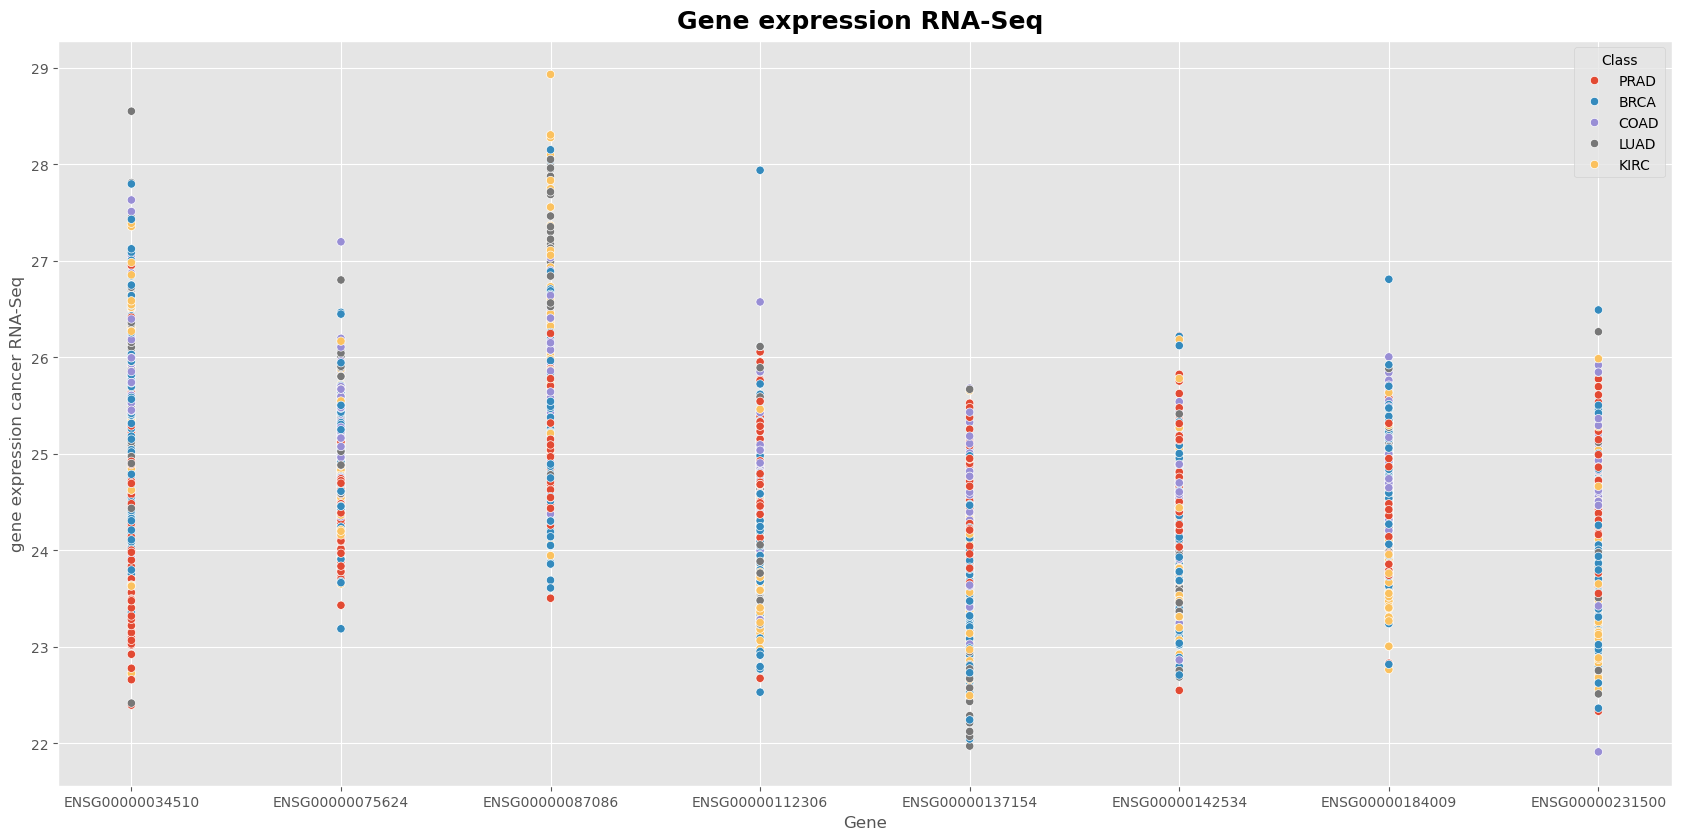

In [45]:
# creating a seaborn scatterplot 
fig_dims = (17, 8.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data_genes_melt, x="Gene", y="value", hue="Class")

# make adjustments
ax.set_ylabel('gene expression cancer RNA-Seq')
ax.set_xlabel('Gene')

ax.text(x=0.5, y=1.01, s='Gene expression RNA-Seq ', fontsize=18, 
        weight='bold', ha='center', va='bottom', transform=ax.transAxes)

fig.tight_layout()
fig.savefig("/Users/usuario/Documents/ML_python/ML_python/3-Outputs/gene_expression_seaborn.png")
plt.show()

Rápido, simple, bonito y fácil de interpretar y sacar algunas conclusiones del análisis de los genes individuales. Por ejemplo, si nos centráramos de nuevo en el gen __ENSG00000087086__, podríamos notar fácilmente que KIRC (Cáncer Renal o de Riñón), parece tener los valores de expresión más altos de nuestros grupos de cáncer. Una vez más siguiendo el enlace a __proteinatlas.org__ específico para [__ENSG00000087086__](https://www.proteinatlas.org/ENSG00000034510-TMSB10), encontramos que el gen está realmente clasificado bajo:
> Marcador pronóstico en _cáncer renal_ y cáncer de tiroides.

Genial!!! conseguimos aprender algo rápidamente a través de nuestro visual estático seaborn. Ahora digamos que empezamos a tener más preguntas, como ¿cuál es la distribución de estos genes? ¿Está sesgada? ¿Qué pasa si quieres centrarte en uno de los tipos de cáncer? ¿tendrás que recodificar y hacer algunos cambios más?

Por supuesto, estoy haciendo todas estas preguntas para guiarnos hacia las características que __Altair__ aporta a nuestro análisis. Definitivamente deberías mirar todos los fantásticos [__Examples__](https://altair-viz.github.io/gallery/index.html) proporcionados por el equipo de altair, pero para este tutorial haremos un gráfico de dispersión con una interactividad añadida y un histograma de las expresiones génicas.

***Nota:*** A menos que esté siguiendo el código de jupyter notebook en su entorno local, el gráfico de altair no se mostrará en la vista del repositorio de github de este tutorial. Ya hay una figura guardada para esta visualización en el directorio [3-Outputs](https://github.com/fredhutchio/ml-pancancer-example/tree/main/3-Outputs) en este repositorio llamada "gene_expression_scatter_hist.html". Puede abrir este archivo html en un navegador y le permitirá explorar la visualización con todas las características interactivas sin tener que ejecutar este cuaderno. Esta es otra de las características útiles de altair que podrían interesarte para usarla en tu investigación.*

In [46]:
# Creación de la visualización Altair

alt.data_transformers.disable_max_rows()

scale = alt.Scale(domain=['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'],
                  range=['#e7ba52', '#a7a7a7', '#aec7e8', '#1f77b4', '#9467bd'])
color = alt.Color('Class:N', scale=scale)

# Creamos dos selecciones:
# - un pincel que está activo en el panel superior
# - un multi-click que está activo en el panel inferior

brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])


# El panel superior es un gráfico de dispersión de la expresión de cada gen

points = alt.Chart().mark_point().encode(
    alt.X('Gene:N', title='Gene'),
    alt.Y('value:Q',
        title='Gene expression cancer RNA-Seq',
        scale=alt.Scale(domain=[21, 29])
    ),
    color=alt.condition(brush, color, alt.value('lightgray'))
).properties(
    width=550,
    height=300
).add_selection(
    brush, click
).transform_filter(
    click
)

# El panel inferior es un gráfico de histograma de cada gen por tipo de cáncer

hists = alt.Chart().mark_area( 
    opacity=0.3, 
    interpolate='step'
).encode(
    x=alt.X('value:Q', bin=alt.Bin(maxbins=30)),
    y=alt.Y('count()',
            stack=None),
    color=alt.condition(click, color, alt.value('lightgray'))
).transform_filter(
    brush
).properties(
    width=550,
).add_selection(
    click
)


# vconcat permite el apilamiento "vertical" de gráficos

gene_expression_scatter_hist = alt.vconcat(
    points,
    hists,
    data=data_genes_melt,
    title="Gene Expression"
)

# guardamos la visual como un archivo html
# se puede abrir en cualquier navegador y las características visuales se mantendrán
gene_expression_scatter_hist.save('/Users/usuario/Documents/ML_python/ML_python/3-Outputs/gene_expression_scatter_hist.html')

# visualizando visual

gene_expression_scatter_hist

/var/folders/6s/c4l75z456lvc6f7lcy342nbm0000gn/T/ipykernel_78985/4186761331.py:14: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use selection_point instead.
  click = alt.selection_multi(encodings=['color'])
/var/folders/6s/c4l75z456lvc6f7lcy342nbm0000gn/T/ipykernel_78985/4186761331.py:19: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use add_params instead.
  points = alt.Chart().mark_point().encode(
/var/folders/6s/c4l75z456lvc6f7lcy342nbm0000gn/T/ipykernel_78985/4186761331.py:37: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use add_params instead.
  hists = alt.Chart().mark_area(


alt.VConcatChart(...)

***NOTA:***
Aquí tenemos un gif que creamos de la visualización Altair renderizada con el propósito de que beamos vean los tipos de características interactivas que tenemos de la visualización. Este gif se hizo con una grabación de pantalla, Altair no produce objetos gif por sí mismo._
![altair_fig](../../ML_python/3-Outputs/Gene_expression_altair.gif "altair_fig")

¡¡¡Impresionante!!! Pudimos recrear (no idénticamente) el gráfico de dispersión y agregar un gráfico de histograma, pero también unir los gráficos e introducir algunas características interactivas que, además de divertidas, son súper útiles para mejorar nuestros análisis.

Deberías tomarte tu tiempo para jugar y experimentar con esta visualización, pero aquí tienes un rápido repaso de lo que puedes hacer:
* Haga clic y resalte la sección horizontal del gráfico superior, que actualiza el gráfico de histograma inferior.
* Haga clic en puntos individuales para seleccionar un tipo de cáncer y "desvanecer" los demás.
* Haga clic en una distribución individual del histograma para resaltar ese tipo de cáncer.

#### Observaciones gráficas
En general, todos estos genes con "recuentos máximos" (como nos referiremos a ellos) parecen tener distribuciones muy similares en cuanto al grupo de cáncer general, en el que se centran en torno a 24 o 25 recuentos. Los genes _LUAD_ (azul oscuro) tienen la distribución más dispersa, aunque siguen centrados en torno a 24-24,5 recuentos, los distintos genes tienen medias muy diferentes. Por otro lado, _PRAD_ (púrpura) tiene todos los genes individuales centrados de forma muy uniforme alrededor de un recuento medio de 24. Esto podría implicar una mayor diferencia entre los genes. Esto podría implicar alguna diferencia mayor entre estos dos tipos de cáncer que con otros que podrían tener distribuciones más similares.

Si nos centramos en los genes individuales, podemos observar que los grupos muestran la mayor varianza de recuento para el gen _ENSG00000034510_, posiblemente implicando menores similitudes entre los grupos de cáncer que en comparación con otros genes como _ENSG00000184009_ , que parece ser el de menor varianza.

# Conclusión

En este tutorial introdujimos conceptos de Ciencia de Datos y Análisis de Datos como el Análisis Exploratorio de Datos (AED) y la estadística descriptiva de nuestros datos. Aprendimos a usar librerías python de análisis de datos como **Pandas, NumPy, Matplotlib, Seaborn,** y **Altair**, y conocimos varias funciones dentro de estas que son útiles en la comprensión general de nuestros datos.

Creamos algunos gráficos estadísticos estándar para el análisis como _histogramas_ y _scatter plots_ a través de Matplotlib y Seaborn, y luego desarrollamos visualizaciones más complejas y útiles en _Altair_ para fomentar nuestra interactividad con los datos. También aprendimos a desarrollar nuestras propias métricas estadísticas descriptivas mediante el uso de _Pandas_ y _NumPy_ y agrupando los datos por categorías de interés.

Ahora podemos pasar al siguiente tutorial de la serie PANCAN Genomic o volver a los anteriores:

- Tutorial 1 - Principiante] (*Actual*)   
- Tutorial 2 - Intermedio]  
- Tutorial 3 - Avanzado]

Esto no! en cosntrucción. También puedes saltar a la [serie de lesiones de melenoma](https://github.com/fredhutchio/ml-melanoma-example), el otro tutorial de Ciencia de Datos y Aprendizaje Automático.